In [33]:
import pygrib
import cfgrib
import yaml
# path = 'E:/Research_Computing/NOA_CFS_data_AWS/cfs.20181031/00/6hrly_grib_01/'
path = "s3://noaa-cfs-pds/cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2"

# Look at with intake
catalog = intake.open_catalog(path)
display(type(catalog))

# look at with xarray
# ds = xr.open_dataset(catalog)# doesn't work

# look at with grib
# grbs = pygrib.open(catalog)
# ds = cfgrib.open_dataset(catalog , # link to the data we are opening from
#                                         engine = 'cfgrib', # Engine We are Using (cfgrib)
#                                         filter_by_keys={'typeOfLevel': 'surface'},
#                                         )
# ds
catalog.parameters()

intake.catalog.local.YAMLFilesCatalog

AttributeError: parameters

In [9]:
import pygrib
import boto3
from botocore import UNSIGNED
from botocore.config import Config

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# s3_object = 'cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2'
# s3_object = 'cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.*.grb2'


obj = s3.get_object(Bucket=bucket_name, Key=s3_object)['Body'].read()
grbs = pygrib.fromstring(obj)

# this should print: <class 'pygrib._pygrib.gribmessage'>
print(type(grbs))


NoSuchKey: An error occurred (NoSuchKey) when calling the GetObject operation: The specified key does not exist.

In [10]:
import boto
from boto.s3.connection import S3Connection
from datetime import timedelta, datetime
import os
import tempfile
# import pyart
from matplotlib import pyplot as plt

import numpy as np

%matplotlib inline
bucket_name =  ' noaa-cfs-pds'

# #first lets connect to the bucket
# conn = S3Connection(anon = True) # Connect to s3
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
obj = s3.get_object(Bucket=bucket_name)['Body'].read()
grbs = pygrib.fromstring(obj)

# get_object(Bucket=bucket_name)
# # bucket = conn.get_bucket(bucket_name)
# #as we can see there is a LOT we can do with a bucket!!!
# dir(bucket)

ParamValidationError: Parameter validation failed:
Invalid bucket name " noaa-cfs-pds": Bucket name must match the regex "^[a-zA-Z0-9.\-_]{1,255}$" or be an ARN matching the regex "^arn:(aws).*:(s3|s3-object-lambda):[a-z\-0-9]*:[0-9]{12}:accesspoint[/:][a-zA-Z0-9\-.]{1,63}$|^arn:(aws).*:s3-outposts:[a-z\-0-9]+:[0-9]{12}:outpost[/:][a-zA-Z0-9\-]{1,63}[/:]accesspoint[/:][a-zA-Z0-9\-]{1,63}$"

In [11]:
import boto3

bucket_name =  ' noaa-cfs-pds'
s3 = boto3.resource('s3')
obj = s3.Object(bucket_name)
body = obj.get()['Body'].read()

ValueError: Required parameter key not set

https://stackoverflow.com/questions/66229140/xarray-read-remote-grib-file-on-s3-using-cfgrib

In [12]:
import fsspec
import xarray as xr
path = "simplecache::s3://noaa-cfs-pds/cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2"

uri = path

file = fsspec.open_local(uri, s3={'anon': True}, filecache={'cache_storage':'/tmp/files'})

ds = xr.open_dataset(file, engine="cfgrib")

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'nominalTop'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudTop'}
    filter_by_keys={'typeOfLevel': 'highCloudBottom'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudTop'}
    filter_by_keys={'typeOfLevel': 'middleCloudBottom'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudTop'}
    filter_by_keys={'typeOfLevel': 'lowCloudBottom'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'convectiveCloudLayer'}
    filter_by_keys={'typeOfLevel': 'boundaryLayerCloudLayer'}
    filter_by_keys={'typeOfLevel': 'hybrid'}

https://stackoverflow.com/questions/67831245/how-to-extract-data-from-grib-files-in-aws-without-downloading

can't access without aws account

cfgrib raw 
* same problem where it wants netcdf4, scipy, store, or zarr as engines

In [15]:
import cfgrib
import xarray as xr
data = 'E:/Research_Computing/NOA_CFS_data_AWS/cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2'
ds = cfgrib.open_dataset(data , # link to the data we are opening from
                                        engine = 'cfgrib', # Engine We are Using (cfgrib)
                                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'hybrid'}},
                                        )
# ds = xr.open_dataset(data, engine = 'cfgrib')
ds


<xarray.Dataset>
Dimensions:     (latitude: 190, longitude: 384)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    hybrid      float64 ...
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    valid_time  datetime64[ns] ...
Data variables:
    t           (latitude, longitude) float32 ...
    q           (latitude, longitude) float32 ...
    u           (latitude, longitude) float32 ...
    v           (latitude, longitude) float32 ...
    gh          (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-11-05T15:58 GRIB to CDM+CF via cfgrib-0.9.1...

https://docs.xarray.dev/en/stable/examples/ERA5-GRIB-example.html
* SO we now know that we have things running enough for the tutorial and we just need to do....something? 

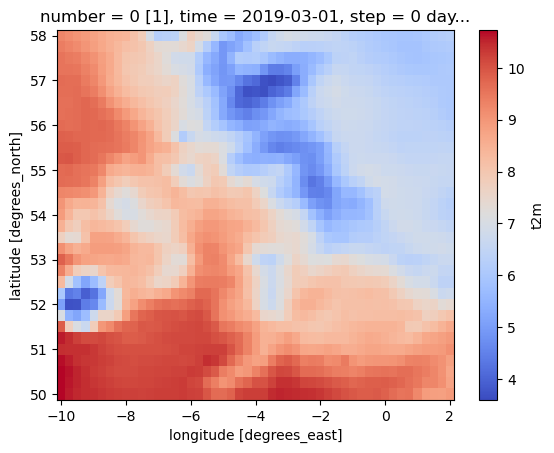

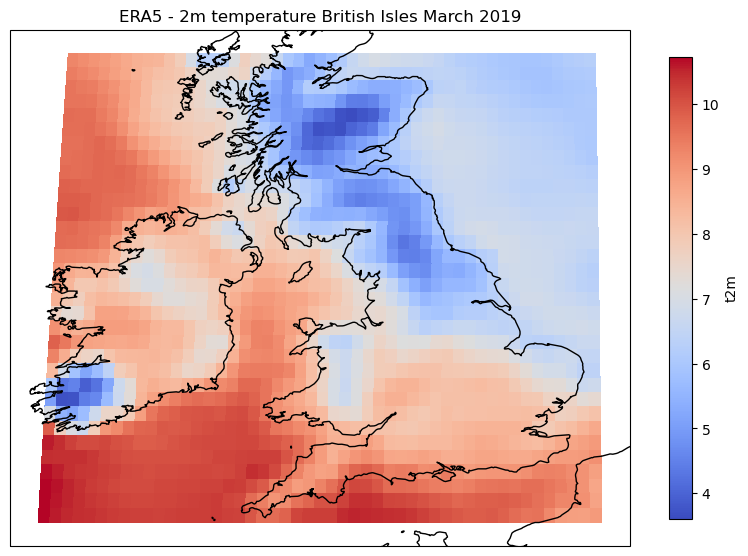

In [13]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.tutorial.load_dataset("era5-2mt-2019-03-uk.grib", engine="cfgrib")
ds = ds - 273.15
ds.t2m[0].plot(cmap=plt.cm.coolwarm)
plt.show()

import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())

plot = ds.t2m[0].plot(cmap=plt.cm.coolwarm,
                                     transform=ccrs.PlateCarree(),
                                     cbar_kwargs={"shrink": 0.6}
                                )
ax.coastlines(resolution="10m")
plt.title("ERA5 - 2m temperature British Isles March 2019")
plt.show()

Pygrib

In [16]:
location = 'E:/Research_Computing/NOA_CFS_data_AWS'
path = '/cfs.20181031/18/time_grib_04/'
file = 'icecon.04.2018103118.daily.grb2'
data = location+path+file

import pygrib
import boto3
from botocore import UNSIGNED
from botocore.config import Config

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
bucket_name = 'noaa-cfs-pds'
s3_object = path

obj = s3.get_object(Bucket=bucket_name, Key=s3_object)['Body'].read()
grbs = pygrib.fromstring(obj)

# this should print: <class 'pygrib._pygrib.gribmessage'>
print(type(grbs))

NoSuchKey: An error occurred (NoSuchKey) when calling the GetObject operation: The specified key does not exist.

https://docs.google.com/document/d/1gbmaMN3qQdEjWefjPpXyrV5_OqHrS4dU8_NnJ4dSh5U/edit#heading=h.f4hvokavag7f

In [5]:
import intake
import xarray as xr
from datatree import DataTree
import kerchunk
from kerchunk.grib2 import scan_grib
bucket = "simplecache::s3://noaa-cfs-pds/cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2"

catalog = intake.open_catalog(bucket)
catalog = scan_grib(bucket)
# catalog = kerchunk.codecs.GRIBCodec(data, dtype = 'float')
# catalog = intake.scan_grib(bucket)

catalog


ConnectTimeoutError: Connect timeout on endpoint URL: "http://169.254.169.254/latest/api/token"

# https://github.com/boto/boto3/issues/1200

https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-download-file.html 

## general boto3 notes
https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-examples.html 

In [3]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config

bucket = "simplecache::s3://noaa-cfs-pds/cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2"
bucket_name =  'noaa-cfs-pds'

# we are accessing an unsigned bucket
s3 = boto3.client('s3', # service type
                            # configuration type
                            config=Config(signature_version=UNSIGNED))

# access the bucket
# s3 = boto3.resource('s3')
# my_bucket = s3.Bucket(bucket_name)

s3 = boto3.client('s3')
with open('FILE_NAME', 'wb') as f:
    # s3.download_fileobj(bucket_name, 'OBJECT_NAME', f)
    print(f)

<_io.BufferedWriter name='FILE_NAME'>


https://stackoverflow.com/questions/67831245/how-to-extract-data-from-grib-files-in-aws-without-downloading

https://stackoverflow.com/questions/69256426/loading-a-grib-from-the-web-in-python-without-saving-the-file-locally


In [64]:
import pygrib
import boto3
from botocore import UNSIGNED
from botocore.config import Config
import cfgrib
import xarray as xr

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
bucket_name =  'noaa-cfs-pds'
s3_object = "cfs.20181031/00/6hrly_grib_01/flxf2018103100.01.2018103100.grb2"
# s3_object = 'blendv3.2/alaska/2020/05/07/1200/probqpf24gt001/blendv3.2_alaska_probqpf24gt001_2020-05-07T12:00_2020-05-08T12:00.tif'
obj = s3.get_object(Bucket=bucket_name, Key=s3_object)['Body']
grbs = pygrib.fromstring(obj.read())
print(type(grbs))

ds = cfgrib.open_dataset(obj, # link to the data we are opening from
                                        engine = 'cfgrib', # Engine We are Using (cfgrib)
                                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}},
                                        )
# ds = xr.open_dataset(data, engine = 'cfgrib')
ds

<class 'pygrib._pygrib.gribmessage'>


<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.7
    history:      2022-11-17T15:44 GRIB to CDM+CF via cfgrib-0.9.10.2/ecCodes...